## Q3

In [21]:
import numpy as np
S0 = 100
theta = 110
k = 2
sig = 0.5
T = 1
r = 0.05

M  = 10**5  #total number of Monte Carlo paths
M2 = 10**4  #number of paths at a time 

err1 = []
err2 = []
err3 = []
err4 = []
hh = []

for p in range(1,8):
    N = 2**p
    h = T/N 

    sum3 = 0 #Used in the approximation error for 2h
    sum4 = 0 #Used in the variance of the previous approximation

    for m in range(1,11):
        m2 = M2
        S  = S0*np.ones((1,m2))
        S2 = S0*np.ones((1,m2))
        W  = 0

        for i in range(1,int(N/2+1)):
            dW1 = np.sqrt(h)*np.random.randn(1,m2)
            S  = S*(1)+k*(theta-S)*h+sig*dW1
            dW2 = np.sqrt(h)*np.random.randn(1,m2)
            S  = S*(1)+k*(theta-S)*h+sig*dW2

            S2 = S2*(1)+2*k*(theta-S2)*h+sig*(dW1+dW2)

        sqr_error  = np.sum((S2-S)**2)
        sum3 = sum3 + np.sum(sqr_error)
        sum4 = sum4 + np.sum(sqr_error**2)



    hh.append(h)

    Vd = sum3/M
    sd = np.sqrt((sum4/M - (sum3/M)**2)/(M-1))
    err3.append(np.sqrt(Vd))
    err4.append((0.5/np.sqrt(Vd)) * 3*sd)



Text(0.5,1,'Strong convergence -- difference from h and 2h approximation')

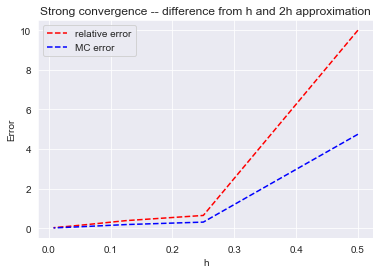

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
#plt.plot(hh,err1,'r',label = 'exact error')
#plt.plot(hh,err2,'b',label = 'MC error')
plt.plot(hh,err3,'r--',label = 'relative error')
plt.plot(hh,err4, 'b--',label = 'MC error')
plt.legend()
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Strong convergence -- difference from h and 2h approximation')

## Q4

In [5]:
import numpy as np
S0 = 100
theta = 0.25
k = 2
sig = 0.5
T = 1
r = 0.05
v0 = 0.25
xi = 0.5
L = np.linalg.cholesky(np.array([[1,-0.1],[-0.1,1]]))

M  = 10**5  #total number of Monte Carlo paths
M2 = 10**4  #number of paths at a time 

err1 = []
err2 = []
err3 = []
err4 = []
hh = []

for p in range(1,7):
    N = 2**p
    h = T/N 

    sum1 = 0 #Used in the approximation error for h
    sum2 = 0 #Used in the variance of the previous approximation
    sum3 = 0 #Used in the approximation error for 2h
    sum4 = 0 #Used in the variance of the previous approximation

    for m in range(1,11):
        m2 = M2
        S  = S0*np.ones((1,m2))
        S2 = S0*np.ones((1,m2))
        v  = v0*np.ones((1,m2))
        v2 = v0*np.ones((1,m2))
        W  = 0

        for i in range(1,int(N/2+1)):
            dW1 = np.sqrt(h)*np.random.randn(m2)
            dW2 = np.sqrt(h)*np.random.randn(m2)
            dW3 = np.sqrt(h)*np.random.randn(m2)
            dW4 = np.sqrt(h)*np.random.randn(m2)
            dW_1 = np.dot(L,np.array([dW1,dW2]))
            dW_2 = np.dot(L,np.array([dW3,dW4]))
            
            S  = S+r*S*h+np.sqrt(abs(v))*S*dW_1[0]
            v  = v+k*(theta-v)*h+xi*np.sqrt(abs(v))*dW_1[1]
            S  = S+r*S*h+np.sqrt(abs(v))*S*dW_2[0]
            v  = v+k*(theta-v)*h+xi*np.sqrt(abs(v))*dW_2[1]
            
            S2 = S2+2*r*S2*h+np.sqrt(abs(v2))*S2*(dW_1[0]+dW_2[0])
            v2  = v2+k*(theta-v2)*2*h+xi*np.sqrt(abs(v))*(dW_1[1]+dW_2[1])
            
        sqr_error  = ((S2-S)**2)
        sum3 = sum3 + np.sum(sqr_error)
        sum4 = sum4 + np.sum(sqr_error**2)
            

    hh.append(h)


    Vd = sum3/M
    sd = np.sqrt((sum4/M - (sum3/M)**2)/(M-1))
    err3.append(np.sqrt(Vd))
    err4.append((0.5/np.sqrt(Vd)) * 3*sd)




In [43]:
np.var(S2-S)

107.84544312849667

Text(0.5,1,'Strong convergence -- difference from h and 2h approximation')

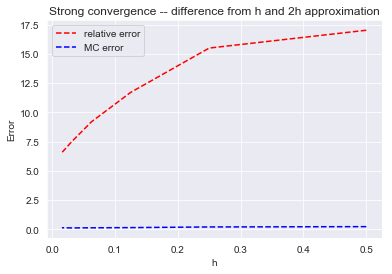

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
#plt.plot(hh,err1,'r',label = 'exact error')
#plt.plot(hh,err2,'b',label = 'MC error')
plt.plot(hh,err3,'r--',label = 'relative error')
plt.plot(hh,err4, 'b--',label = 'MC error')
plt.legend()
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Strong convergence -- difference from h and 2h approximation')